You've been hired to help the company improve retention by identifying high value customers and churn risks, and have been asked to present your findings to the CMO in the form of a single page report or dashboard.

Data Source: https://www.mavenanalytics.io/data-playground

In [1]:
# Importing the necessary libaraies

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# loading of the dataset

df_1 = pd.read_csv('telecom_customer_churn.csv', sep=',')
df_2 = pd.read_csv('telecom_zipcode_population.csv', sep=',')

In [3]:
# merging the dataset together

df = pd.merge(df_1,df_2, on ='Zip Code' )

In [4]:
# checking

df.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,65.60,593.3,0.00,0,381.51,974.81,Stayed,NaN,NaN,4498
1,5183-SNMJQ,Male,32,No,0,Frazier Park,93225,34.827662,-118.999073,0,...,95.10,865.1,43.25,0,456.90,1278.75,Stayed,NaN,NaN,4498
2,6847-KJLTS,Female,72,Yes,0,Frazier Park,93225,34.827662,-118.999073,8,...,100.40,5749.8,0.00,0,2745.72,8495.52,Stayed,NaN,NaN,4498
3,8788-DOXSU,Male,46,No,0,Frazier Park,93225,34.827662,-118.999073,0,...,61.35,3645.5,0.00,0,572.30,4217.80,Stayed,NaN,NaN,4498
4,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,-4.00,542.4,38.33,10,96.21,610.28,Stayed,NaN,NaN,31297


In [5]:
# dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [6]:
# droping off the null values

df = df.dropna()

In [7]:
#dropping off the duplicates

df = df.drop_duplicates()

In [8]:
# checking

df.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
5,1918-ZBFQJ,Female,48,No,3,Glendale,91206,34.162515,-118.203869,0,...,79.25,1111.65,48.25,0,436.02,1499.42,Churned,Competitor,Competitor had better devices,31297
7,6365-MTGZX,Male,44,No,0,Glendale,91206,34.162515,-118.203869,0,...,96.00,2122.45,0.00,0,594.24,2716.69,Churned,Competitor,Competitor had better devices,31297
9,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,62069
13,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,46677
14,2834-JRTUA,Male,30,No,0,Martinez,94553,38.014457,-122.115432,0,...,108.05,7532.15,0.00,0,3508.82,11040.97,Churned,Competitor,Competitor had better devices,46677


In [9]:
# Dropping of the unused coluns

df.drop(['Zip Code','Latitude','Longitude','Avg Monthly Long Distance Charges','Gender','Total Charges','Total Refunds','Total Extra Data Charges','Total Long Distance Charges','Monthly Charge','Married','Age','Number of Dependents','Population','Avg Monthly GB Download','Internet Type','Streaming TV','Streaming Movies','Streaming Music','City','Customer Status','Phone Service','Internet Service'],axis=1, inplace= True)

Key variable:
Total Revenue, Contract,Premium Tech Support,Device Protection Plan,Online Security,Offer,Tenure in Months

others: Phone Service,Internet Service

In [10]:
# Checking

df.head(5)

,Customer ID,Number of Referrals,Tenure in Months,Offer,Multiple Lines,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Unlimited Data,Contract,Paperless Billing,Payment Method,Total Revenue,Churn Category,Churn Reason
5,1918-ZBFQJ,0,13,None,No,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,1499.42,Competitor,Competitor had better devices
7,6365-MTGZX,0,24,None,No,No,No,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,2716.69,Competitor,Competitor had better devices
9,0004-TLHLJ,0,4,Offer E,No,No,No,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,415.45,Competitor,Competitor had better devices
13,0011-IGKFF,1,13,Offer D,No,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,1599.51,Dissatisfaction,Product dissatisfaction
14,2834-JRTUA,0,71,Offer A,Yes,Yes,No,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,11040.97,Competitor,Competitor had better devices


In [11]:
df['Number of Referrals'].sum()

849

In [12]:
# Replacing the Month-to-Month with Monthly

df['Contract'] = df['Contract'].replace('Month-to-Month','Monthly')

In [13]:
# Converting the Total Revenue datatypes to int 

df['Total Revenue'] = df['Total Revenue'].astype(int)

In [14]:
# Coping the dataset

df_copy = df.copy()

In [15]:
# Checking

df_copy

,Customer ID,Number of Referrals,Tenure in Months,Offer,Multiple Lines,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Unlimited Data,Contract,Paperless Billing,Payment Method,Total Revenue,Churn Category,Churn Reason
5,1918-ZBFQJ,0,13,None,No,No,Yes,Yes,No,Yes,Monthly,Yes,Bank Withdrawal,1499,Competitor,Competitor had better devices
7,6365-MTGZX,0,24,None,No,No,No,No,Yes,Yes,Monthly,Yes,Bank Withdrawal,2716,Competitor,Competitor had better devices
9,0004-TLHLJ,0,4,Offer E,No,No,No,Yes,No,Yes,Monthly,Yes,Bank Withdrawal,415,Competitor,Competitor had better devices
13,0011-IGKFF,1,13,Offer D,No,No,Yes,Yes,No,Yes,Monthly,Yes,Bank Withdrawal,1599,Dissatisfaction,Product dissatisfaction
14,2834-JRTUA,0,71,Offer A,Yes,Yes,No,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,11040,Competitor,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7030,9102-IAYHT,1,17,None,Yes,No,No,No,No,Yes,Monthly,Yes,Bank Withdrawal,2263,Attitude,Attitude of support person
7031,7774-OJSXI,0,31,None,Yes,No,Yes,Yes,No,Yes,One Year,Yes,Bank Withdrawal,3353,Dissatisfaction,Poor expertise of phone support
7032,9725-SCPZG,0,1,Offer E,No,No,No,No,No,Yes,Monthly,Yes,Bank Withdrawal,91,Price,Price too high
7035,9025-AOMKI,0,6,Offer E,Yes,No,No,No,No,Yes,Monthly,Yes,Bank Withdrawal,799,Other,Moved


## Descriptive Statistics

In [16]:
df_copy.describe()

,Number of Referrals,Tenure in Months,Total Revenue
count,1586.000000,1586.000000,1586.000000
mean,0.535309,18.902900,2220.782472
std,1.122335,19.759294,2543.065113
min,0.000000,1.000000,46.000000
25%,0.000000,3.000000,259.500000
50%,0.000000,11.000000,1142.000000
75%,1.000000,31.000000,3414.000000
max,9.000000,72.000000,11195.000000


Insights:
    
The minimum Number of Referrals for Referrals is 0, meanNumber of Referrals is 0.5353, and the maximum Number of Referrals is 9.

The minimum value for Tenure in Months is 1, mean Tenure in Months is 18.9, and the maximum enure in Months is 72.

The minimum value for Total Revenue is $ 46, mean Revenue is $ 2220, and the maximum Total Revenue is $ 11195.

## Data Visualisation

### Plot of Churn Category and Churn Reasons

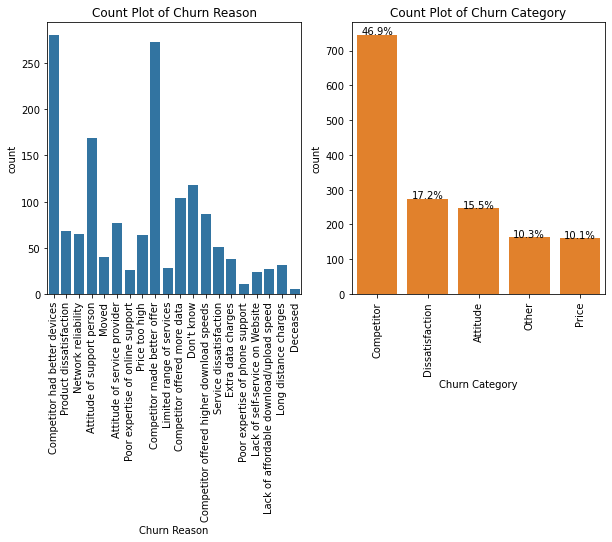

In [63]:
# Plotting of chrun reasons

plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)

sns.countplot(data=df_copy, x='Churn Reason', color = sns.color_palette()[0])
plt.xticks(rotation=90);
plt.title('Count Plot of Churn Reason')

plt.subplot(1, 2, 2)
# Plotting of chrun category
dem = df_copy['Churn Category'].value_counts()
dem_s = df_copy['Churn Category'].value_counts().sum()

sns.countplot(data=df_copy, x='Churn Category',color = sns.color_palette()[1])
locs, labels = plt.xticks(rotation=90)
plt.title('Count Plot of Churn Category')

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = dem[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/dem_s)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

from the plot above, it shows that most customer left as a result of competitor factor. and this customer contirbuted to the large portion of the company revenue. Also, From the plot above, it shows that 46.9% of the customer left as a result of competitor.

### Plot of Payment Method

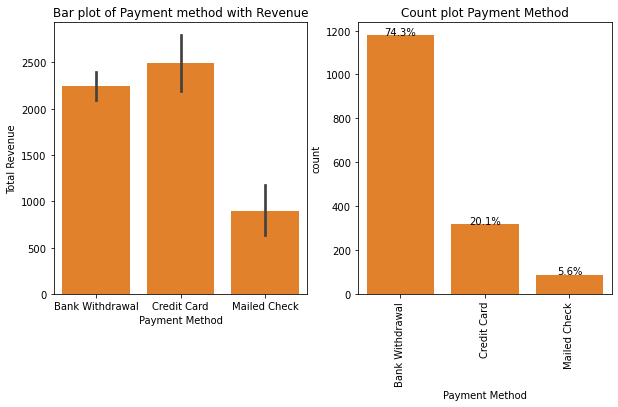

In [71]:
# Plotting of Payment Method

plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)

sns.barplot(data=df_copy, x='Payment Method', y='Total Revenue',color = sns.color_palette()[1])
plt.title('Bar plot of Payment method with Revenue')


plt.subplot(1, 2, 2)

# Plotting of Payment Method
we = df_copy['Payment Method'].value_counts()
we_s = df_copy['Payment Method'].value_counts().sum()

sns.countplot(data=df_copy, x='Payment Method', color = sns.color_palette()[1])
locs, labels = plt.xticks(rotation=90)
plt.title('Count plot Payment Method')

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = we[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/we_s)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

From the plot above, it shows that credit card payment contributed to larger portion of the company revenue than other payment method. Also, From the plot above, it shows that 74.3% of the customer uses Bank withdrawal method than other payment method.

### Promotional Offer Plot

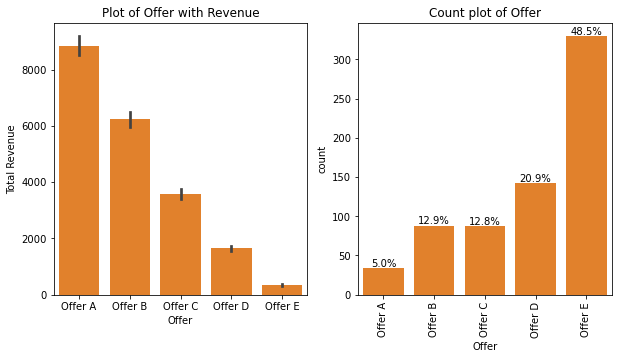

In [74]:
# Plotting of the Offer

plt.figure(figsize = [10, 5])

plt.subplot(1, 2, 1)

df_c = df_copy.loc[df_copy['Offer'].isin(['Offer A','Offer B','Offer C','Offer D','Offer E'])]

order_1 =['Offer A','Offer B','Offer C','Offer D','Offer E']

sns.barplot(data=df_c, x='Offer', y='Total Revenue', color= sns.color_palette()[1], order= order_1);
plt.title('Plot of Offer with Revenue')

plt.subplot(1, 2, 2)

wei = df_c['Offer'].value_counts()
wei_s = df_c['Offer'].value_counts().sum()

sns.countplot(data=df_c, x='Offer', color= sns.color_palette()[1], order=order_1)
plt.title('Count plot of Offer')

locs, labels = plt.xticks(rotation=90)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = wei[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/wei_s)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

From the plot above, it shows that offer A promotion contributed to larger part of the company reveune.

###  Plot of Revenue and Number of Referrals

Text(0.5, 1.0, 'Bar plot of Revenue and Number of Referrals')

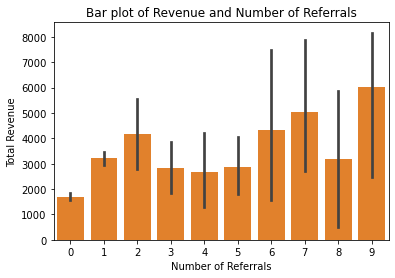

In [75]:
# Plotting of the Number of Referrals

sns.barplot(data=df_copy, x='Number of Referrals', y='Total Revenue', color= sns.color_palette()[1])
plt.title('Bar plot of Revenue and Number of Referrals');

In [48]:
### sum of the Number of Referrals

df_copy['Number of Referrals'].value_counts().sum()

1586

The plot shows that 9 group of customers that were referred by the old customers, contributed more to the company total revenue than others.

### Plot of the Premium Tech Support with online security

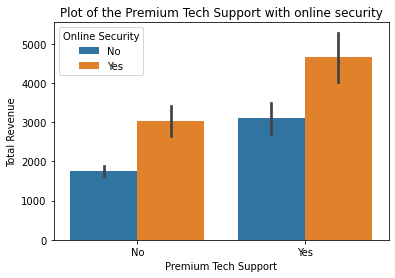

In [77]:
# Plotting of the Premium Tech Support

sns.barplot(data=df_copy, x='Premium Tech Support', y='Total Revenue', hue='Online Security')
plt.title('Plot of the Premium Tech Support with online security');

The plot shows that customers that were offer premium support and online security used the company service and in tur contributed to the increase in the company revenue

### Plot of the Contract with Device Protection Plan

Text(0.5, 1.0, 'Plot of the Contract wit Device Protection Plan')

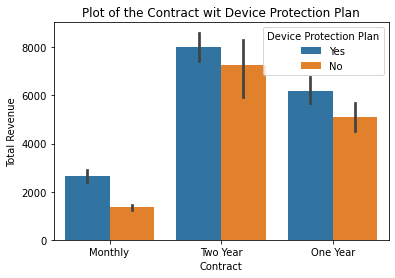

In [78]:
# Plotting of the Contract

sns.barplot(data=df_copy, x='Contract', y='Total Revenue', hue='Device Protection Plan')
plt.title('Plot of the Contract wit Device Protection Plan')

The plot shows that customers with two year service contract with device protection plan from the company, contributed a large share to the company total revenue.

### Plot Contract with Revenue

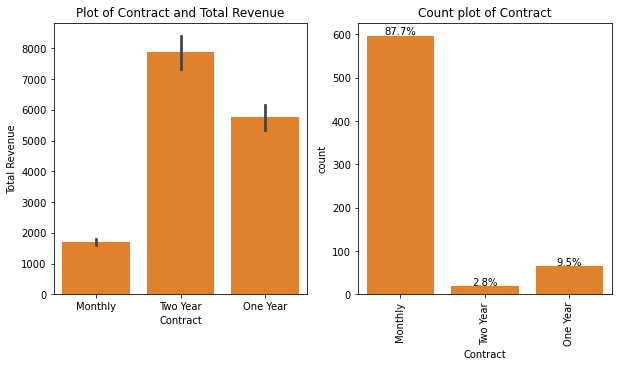

In [83]:
# Plotting of the Contract
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)

cat = sns.color_palette()[1]
sns.barplot(data=df_copy, x='Contract', y='Total Revenue', color=cat)
plt.title('Plot of Contract and Total Revenue')

plt.subplot(1, 2, 2)

wee = df_c['Contract'].value_counts()
wee_s = df_c['Contract'].value_counts().sum()

sns.countplot(data=df_c, x='Contract', color= sns.color_palette()[1])
plt.title('Count plot of Contract')
locs, labels = plt.xticks(rotation=90)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = wee[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/wee_s)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

### Plot of the Contract and Number of Referrals with Revenue

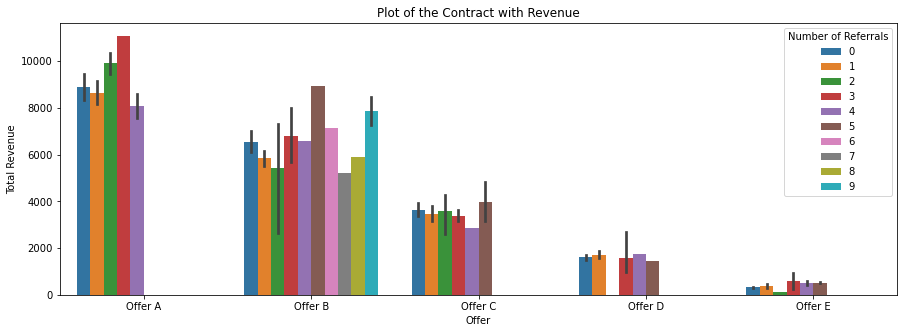

In [81]:
# Plotting of the Contract

plt.figure(figsize=(15,5))
sns.barplot(data=df_c, x='Offer', y='Total Revenue', hue='Number of Referrals', order=order_1)
plt.title('Plot of the Contract with Revenue');

note;  The referrals the customer brought to the company might also go, if the person that brought them left the company, which might be reducing the company overall customer.

## Conclusion:

* According to our findings, 46.9% of customers who left the company did so because a competitor offered a better service, a better device, and a faster download speed, 17.2% of customers left due to product and service dissatisfaction, 15.5% of customers left due to a bad attitude of customer support, 10.3% of customers left for no apparent reason, and 10.1% of customers left due to high price.


* According to our findings, 74.3% of customers utilize bank withdrawal as a payment method, with credit card payments accounting for a higher amount of income than bank transfer and postal check. This might imply that customers with significant charges use credit cards to pay.


* According to our findings, 48.5% of customers choose offer E, whereas offer A special offer converts customers and contributes to an increase in company income.


* We discovered that the new client introduced to the firm by the customer sumed to 1586 increased the company's overall revenue. If the client who brought them leaves the firm, the company may lose these referrals.


* Customers who were provided and chose Premium Tech Support and Online Security contributed to the company's earnings.


* We discovered that 87.7% of customers subscribe to monthly plans, while 2.8% of customers subscribe to two-year contracts contributed more to the company's income.


* We discovered that offer B generated more recommendations for the organization, but offer A generated more income.

## Recommendation

The main objective of these analysis is to improve customer retention by identifying high value customers and churn risks.

* In order for the firm to reach its aim and attract new customers, it should cut its production costs in order to reduce its fee charge and grow his income. Most customers left the firm because of the price and poor quality of the product, as indicated in the consultation, and if these issues are resolved, customer retention will increase.


* The firm should run promotional offers A and B more often. As Offer B attracts more referrals to the organization and Offer A contributes more to revenue growth.


* The firm should run a discount offer for the consumer on a two-year contract, since this would boost customer retention and raise company income.